# **ANALIZA SKŁADOWYCH GŁÓWNYCH**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Załadowanie zbioru danych:

In [2]:
data=pd.read_csv('PCA_dataset.csv')
data

,X,Y
0,-0.625302,-0.170064
1,0.960695,0.590901
2,-0.598543,-0.402593
3,-2.228059,-0.532577
4,-0.461430,-0.498867
...,...,...
195,0.838409,0.278380
196,0.312708,-0.010600
197,1.955876,0.638224
198,-1.108304,-0.395054


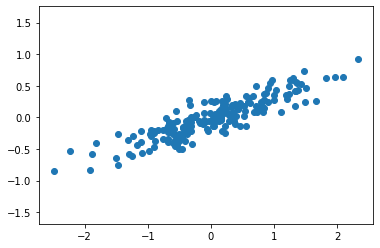

In [3]:
plt.scatter(data.iloc[:,0], data.iloc[:,1])
plt.axis('equal');

## Dwie składowe główne

Wyliczamy dwie składowe główne (**n_components=2**) czyli wektory bazowe nowego układu współrzędnych:

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data)

PCA(n_components=2)

Wektory bazowe nowego układu wpółrzędnych: 

In [5]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


Wariancje dla nowych współrzędnych:

In [6]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


Dodajemy do wykresu wektory wyznaczające nowy układ współrzędnych. Ich długość określona jest przez wariancje: 

In [7]:
def draw_vector(v0, v1, ax=None):
  ax = ax or plt.gca()
  arrowprops=dict(arrowstyle='->',
  linewidth=2,
  shrinkA=0, shrinkB=0, color='black')
  ax.annotate('', v1, v0, arrowprops=arrowprops)

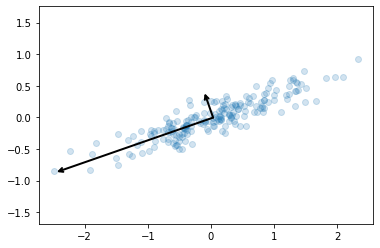

In [8]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
  v = vector * 3 * np.sqrt(length)
  draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

Współrzędne punktów w **nowym układzie współrzędnych**:

In [9]:
data_pca = pca.transform(data)
data_pca

array([[ 6.76769235e-01,  5.97386015e-02],
       [-1.07121393e+00,  2.57240064e-01],
       [ 7.27912364e-01, -1.68669939e-01],
       [ 2.30964136e+00,  2.44066575e-01],
       [ 6.30052323e-01, -3.04655713e-01],
       [ 1.02448887e+00,  7.56230140e-02],
       [ 7.77183507e-01, -8.34608477e-02],
       [-1.39656414e+00,  1.44518385e-01],
       [-2.91049874e-01, -2.01289478e-01],
       [ 1.88864221e+00,  2.31419563e-01],
       [-7.11544293e-01,  1.13426118e-01],
       [ 6.38884130e-01,  3.88212853e-02],
       [ 5.48059617e-01, -2.00775267e-01],
       [-2.19312436e-01,  2.08243673e-01],
       [-3.87789490e-01,  6.89135848e-02],
       [ 7.15219956e-01,  1.13841003e-01],
       [-1.08373816e+00,  7.78081042e-02],
       [-2.99917403e-01, -5.86382919e-02],
       [-7.96849021e-01,  2.44527383e-01],
       [-8.12568346e-01, -1.17341246e-01],
       [-1.54018281e+00, -3.24862050e-02],
       [-2.52920476e-01, -4.86012463e-02],
       [ 6.26464454e-01, -1.68045678e-01],
       [-1.

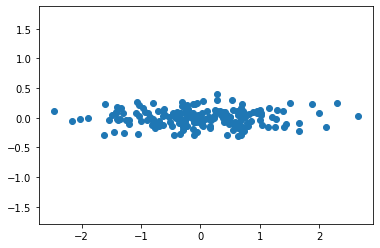

In [10]:
plt.scatter(data_pca[:,0], data_pca[:,1])
plt.axis('equal');

## Jedna składowa główna

Wyliczamy jedną składową główną (**n_components=1**) - chcemy wyeliminować jeden wymiar danych.

In [11]:
pca = PCA(n_components=1)
pca.fit(data)

PCA(n_components=1)

Współrzędne punktów w **nowym układzie współrzędnych**:

In [12]:
data_pca = pca.transform(data)  

Porówanie kształtów danych początkowych i po redukcji jednego wymiaru:

In [13]:
print("Początkowy shape: ", data.shape)
print("Po transformacji shape:", data_pca.shape)

Początkowy shape:  (200, 2)
Po transformacji shape: (200, 1)


Dane początkowe i po redukcji wymiaru:

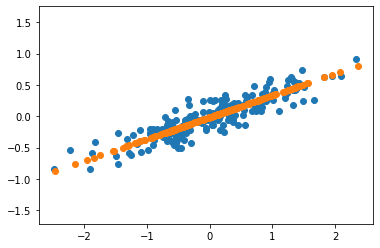

In [14]:
data_new = pca.inverse_transform(data_pca)
plt.scatter(data.iloc[:, 0], data.iloc[:, 1]),
plt.scatter(data_new[:, 0], data_new[:, 1]),
plt.axis('equal');